<h1><center>SE422 Introduction to Data Science</center></h1> 
<h2>
<center>Project 2
<br> 
09/12/2020
</center>
</h2> 

There are four sections.
The total score you can get is 105.

In [ ]:
# The solution for this part is from Öktem Demircigil
# I like the solution in general, there are other good solutions in the submissions as well

### Section 1 (15 Points)

In [ ]:
#Library Imports
import scipy.stats
import numpy as np
import pandas as pd
from collections import Counter
import math, random
from scipy.stats import norm
import statistics
import itertools

In [ ]:
# Use the dataset given below
# You do not need to do anything here.
# Use X and y
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
totalValue = sum(int(x) for x in my_id)
X, y = make_regression(n_samples=30, n_features=1, noise=10,random_state=totalValue)
X=X.reshape(30,)


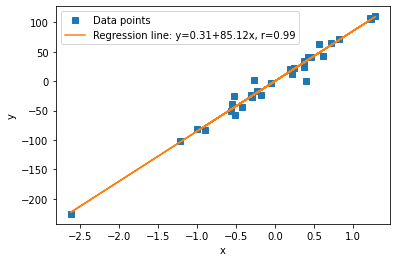

In [ ]:
# plot X and y values to show the relationship between X and y
slope, intercept, r, *__ = scipy.stats.linregress(X, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(X, y, linewidth=0, marker='s', label='Data points')
ax.plot(X, intercept + slope * X, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()


In [ ]:
# Find covarience for X and y
# Analyze the output, you can use comment lines
np.cov(X,y)
#“large” positive covariance means that x tends to be large when y is large and small when y is small. 5.67 is positive so x and y get both teds to grow.



array([[6.66641357e-01, 5.67452008e+01],
       [5.67452008e+01, 4.94050447e+03]])

In [ ]:
# Find correlation between X and y.
# Analyze the output, you can use comment lines
# Plot the corolation matrix
np.corrcoef(X,y)
# Same as previous plot
# 0.98 is our correlation coefficient. It is positive so positive slope and there are true linear dependency. If it was 0 there wold be no linear dependency.


array([[1.        , 0.98877474],
       [0.98877474, 1.        ]])

### Section 2 (30 Points)

In [ ]:
from collections import Counter
import math, random, csv, json, re
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load "books.html" file to BeautifulSoup
# You may need to use "utf8" as encoding
with open("/content/drive/MyDrive/books.html") as file:
    soup = BeautifulSoup(file)


In [ ]:
# Extract the information ("name","price","nb_in_stock","url_img","product_category","rating") for each book
# Store them into a row list
name = []
price = []
nb_in_stock = []
url_img = []
product_category = []
rating = []


table_body=soup.find('tbody')
rows = table_body.find_all('tr')
for row in rows:
    cols=row.find_all('td')
    cols=[x.text.strip() for x in cols]
    name.append(cols[0])
    price.append(cols[1])
    nb_in_stock.append(cols[2])
    url_img.append(cols[3])
    product_category.append(cols[4])
    rating.append(cols[5])

In [ ]:
# Create pandas dataframe
# Show the first 5 books
data = {'Name':name,
        'Price':price,
        'Stock':nb_in_stock,
        'Image Url':url_img,
        'Category':product_category,
        'Rating':rating}
df = pd.DataFrame(data)
print(df.head(5))

                                    Name  Price  ...              Category Rating
0                   A Light in the Attic  44.49  ...             poetry_23  Three
1                     Tipping the Velvet  42.11  ...  historical-fiction_4    One
2                             Soumission  62.74  ...            fiction_10    One
3                          Sharp Objects  49.88  ...             mystery_3   Four
4  Sapiens: A Brief History of Humankind  57.15  ...            history_32   Five

[5 rows x 6 columns]


### Section 3 (30 Points)

In [ ]:
# Find the metrics (mean, std, min, max) of book prices('price')
price = [float(x) for x in price]
nb_in_stock = [int(x) for x in nb_in_stock]
print("Mean of Price is ", np.mean(price))
print("STD of Price is ", np.std(price))
print("Min of Price is ", np.min(price))
print("Max of Price is ", np.max(price))

Mean of Price is  50.44447
STD of Price is  10.088036118050928
Min of Price is  20.69
Max of Price is  82.55


In [ ]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

mu =  50.44447 
std =  10.088036118050928


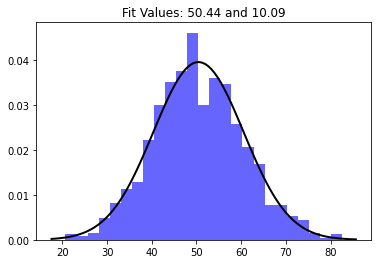

In [ ]:
# Plot the histogram of book prices
# What kind of distribution does the prices have ?
# Analyze the distribution
plt.hist(price, bins=25, density=True, alpha=0.6, color='b')
mu, std = norm.fit(price)
print("mu = ",mu,"\nstd = ",std)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
plt.show()
# This looks like a symetric distrubution


In [ ]:
# What is the probability of the randomly selected book whose price is less than 45.
def experiment_probability(test_num):
  less_than_num = 0
  test_num = test_num

  for i in range(test_num):
    book_price = random.choice(price)
    if book_price < 45 :
      less_than_num += 1
  print(less_than_num/test_num,"% selected book's price is less than 45.")

is_continue = "Y" or "y"
while is_continue == "Y":
  repeat_num = int(input("Enter repeat number: "))
  tests = int(input("Enter experiment number: "))
  for i in range(repeat_num):
    experiment_probability(tests)
  is_continue = input("Continue(Press Y to continue): ")


Enter repeat number: 5
Enter experiment number: 10000
0.3 % selected book's price is less than 45.
0.3073 % selected book's price is less than 45.
0.3005 % selected book's price is less than 45.
0.3104 % selected book's price is less than 45.
0.3051 % selected book's price is less than 45.
Continue(Press Y to continue): 


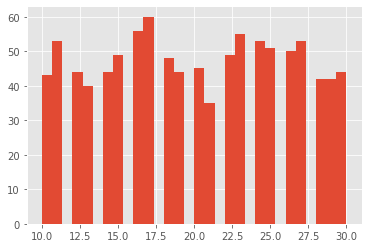

Probability Test:

Enter repeat number: 5
Enter experiment number: 10000
1.0 % selected book's stock is less than 0.
1.0 % selected book's stock is less than 0.
1.0 % selected book's stock is less than 0.
1.0 % selected book's stock is less than 0.
1.0 % selected book's stock is less than 0.
Continue(Press Y to continue): 


In [ ]:
# Look at the 'nb_in_stock' values
# Plot histogram of the number of books in the stock
plt.style.use('ggplot')
plt.hist(nb_in_stock,bins=30)
plt.show()
print("Probability Test:\n")
# What kind of distribution does it have ? 

# Looks like a uniform distribution

# Analyze your findings
# What do you think about the probability of the number of books in the stock when we select a book randomly
def experiment_probability(test_num):
  conform_condi_num = 0

  for i in range(test_num):
    book_stock = random.choice(nb_in_stock)
    if book_stock > 0 :
      conform_condi_num += 1
  print(conform_condi_num/test_num,"% selected book's stock is less than 0.")

is_continue = "Y" or "y"
while is_continue == "Y":
  repeat_num = int(input("Enter repeat number: "))
  tests = int(input("Enter experiment number: "))
  for i in range(repeat_num):
    experiment_probability(tests)
  is_continue = input("Continue(Press Y to continue): ")



### Section 4 (30 Points)

In [ ]:
# Count words in the book titles (names)
name_string =""
delete_list = []
for x in name:
  name_string += " "
  name_string += x
ptext = re.sub(r'[^\w\s]','',name_string )
words = re.split(r"[\s]",ptext)
words = [x.lower() for x in words]

word_counted = Counter(word for word in words)
word_counted = dict(sorted(word_counted.items(),key=lambda item: item[1], reverse = True))
for x in word_counted.items():
  if x[0].isnumeric() or len(x[0]) == 0:
    delete_list.append(x[0])
  
for x in delete_list:
  del word_counted[x]



word_frame = pd.DataFrame(word_counted.items(),columns=['Words', 'Appearences'])
print(word_frame)

# There are 1000 books. Therefore, We will use 1000 book titles
# You need to find the words and count their apperances in the book titles
# For example,  "Volume" appears 12 times in the book titles.
# You may want to use Counter class 


         Words  Appearences
0          the          632
1           of          256
2          and          185
3            a          165
4           to           90
...        ...          ...
2421      spys            1
2422  devotion            1
2423   regency            1
2424       1st            1
2425    womens            1

[2426 rows x 2 columns]


In [ ]:
# Find the words that appear more than 10 times in the book titles
print(word_frame.head(10))


  Words  Appearences
0   the          632
1    of          256
2   and          185
3     a          165
4    to           90
5    in           71
6   for           58
7   vol           45
8   you           40
9  life           37


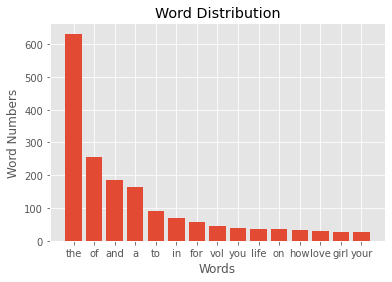

In [ ]:
# Plot the number of words in the book titles by using plt.bar

# I am going to plot only first 15 of them because ploting a table that long is meaningless.

out = dict(itertools.islice(word_counted.items(), 15)) 
plt.bar(out.keys(), out.values())
plt.xlabel("Words")
plt.ylabel("Word Numbers")
plt.title("Word Distribution")
plt.show()


